# Notebook 9 – Linear Regression

In this notebook, we'll explore the concept of linear regression. In the corresponding worksheet, you got to see the math behind how all of this works. Here, we'll implement some functions to take care of this for us.

In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Of course, there are functions already written that will take in two arrays of numbers and return the regression line. However, we can learn a lot by writing these functions ourselves. The first step is to create a function that converts an array into standard units.

In [4]:
def standard_units(x):
    x_standard = np.array([])    # Creates a blank array, which we will fill with the standardized values
    mean = np.mean(x)            # Assigns the variable "mean" to the mean of array x
    std = np.std(x)              # Assigns the variable "std" to the standard deviation of array x
    
    for xi in x:
        xi_standard = (xi - mean)/std       # Calculates the standardized version of each element
        x_standard = np.append(x_standard, xi_standard)   # Adds the standardized version of the current element to the output
        
    return x_standard            # Returns the output array

Now, we need a function to calculate $r$, the correlation coefficient between two arrays. This will use our `standard_units` function.

In [5]:
def correlation(x, y):
    x_standard = standard_units(x)
    y_standard = standard_units(y)
    
    return np.mean(x_standard * y_standard)    # r is the mean of the product of x and y in standard units

Now we have the necessary "helper functions" to create a single function that will take in two arrays and return the  regression line.

In [6]:
def regression_line(x, y):
    r = correlation(x, y)
    
    m = round(r * np.std(y) / np.std(x), 3)
    b = round(np.mean(y) - m * np.mean(x), 3)
    
    # Prints the regression line before we return the values of m and b
    if b > 0:
        print("Regression line: y = {0}x + {1}".format(m, b))
    elif b == 0:
        print("Regression line: y = {0}x".format(m))
    else:
        print("Regression line: y = {0}x - {1}".format(m, np.abs(b)))
        
        
    return m, b        # Returns both m and b

Let's test our code out with an example that we can quickly verify. If we try to find the regression line of a set of points that lie directly on some line, the regression line should be the line the points are from. Consider the following two arrays, where clearly, all of the points lie on $y = 2x - 1$:

In [7]:
a = np.array([1, 2, 3, 4, -4])
b = np.array([1, 3, 5, 7, -9])

Let's see what happens when we call `regression_line` on these two arrays.

In [8]:
regression_line(a, b)

Regression line: y = 2.0x - 1.0


(2.0, -1.0)

This is exactly what we expected. Before we preceed with two real-world datasets, there's an important lesson to highlight. **LINEAR REGRESSION DOESN'T ALWAYS MAKE SENSE.** Consider the following example:

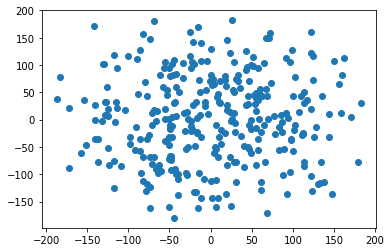

In [63]:
circular = Table.read_table("circular.csv")
plt.scatter(circular.column(0), circular.column(1))
plt.show()

We can still calculate the regression line for this set of data:

Regression line: y = 0.031x + 1.712


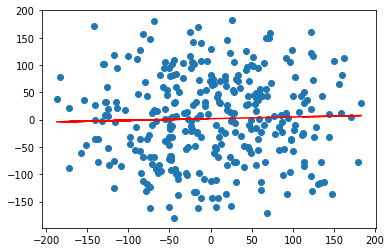

In [64]:
circular_slope, circular_intercept = regression_line(circular.column(0), circular.column(1))
plt.scatter(circular.column(0), circular.column(1))
plt.plot(circular.column(0), circular_slope*circular.column(0) + circular_intercept, 'r')
plt.show()

But as you can see, it wouldn't really make sense to make predictions with this line, as the data set isn't linear. If you look at the value of $r$ for this dataset:

In [66]:
r_circular = correlation(circular.column(0), circular.column(1))
r_circular

0.030326948635015609

... we see that it is very close to 0, meaning that the two variables we're observing aren't very correlated. The takeaway you should have from this is **the greater the correlation, the more it makes sense to use linear regression**. Now, let's look at some real world examples.

## Dataset – Heights of Children

In [9]:
family_height = Table.read_table('family.csv')
family_height

Family,Father,Mother,Gender,Height,Kids
1,78.5,67,M,73.2,4
1,78.5,67,F,69.2,4
1,78.5,67,F,69,4
1,78.5,67,F,69,4
2,75.5,66.5,M,73.5,4
2,75.5,66.5,M,72.5,4
2,75.5,66.5,F,65.5,4
2,75.5,66.5,F,65.5,4
3,75,64,M,71,2
3,75,64,F,68,2


The above table features the heights of parents and children in families. In its current format, we can't really do any linear regression, so let's modify the table to show the average heights of parents in one column and the childrens' heights in the other column.

In [10]:
family_height = family_height.with_columns('Midparentheight', (family_height.column('Father')+family_height.column('Mother'))/2)
heights = Table().with_columns(
    'avg_parent', family_height.column('Midparentheight'),
    'child', family_height.column('Height')
    )
heights

avg_parent,child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


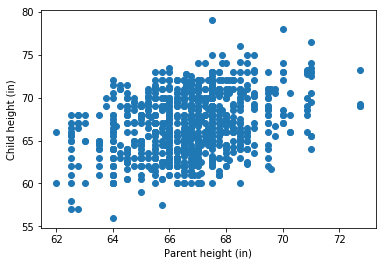

In [11]:
# Run this cell to see a scatter plot of these points
plt.scatter(heights.column(0), heights.column(1))
plt.xlabel("Parent height (in)")
plt.ylabel("Child height (in)")
plt.show()

It looks like there's an upward trend between the heights. **REMEMBER, IT DOESN'T ALWAYS MAKE SENSE TO USE LINEAR REGRESSION!** Let's now try and create a **linear model** for this set of data. That is, we want to try and predict the height of a child given the average height of his/her parents.

Regression line: y = 0.669x + 22.166


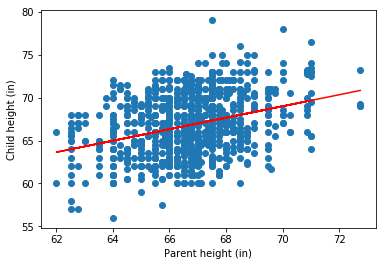

In [48]:
# Replace the ... with the appropriate code to find the equation of the regression line!
slope_parent_child, intercept_parent_child = regression_line(heights.column(0), heights.column(1))

# This part will plot the regression line along with the set of points.
plt.scatter(heights.column(0), heights.column(1))
plt.xlabel("Parent height (in)")
plt.ylabel("Child height (in)")
plt.plot(heights.column(0), slope_parent_child*heights.column(0) + intercept_parent_child, 'r')
plt.show()

Using the slope and intercept that we've found, we'll create a **prediction function**. That is, this function will predict a child's height given the mean height of that child's parents.

In [49]:
# Replace the ... with variables that we defined in the previous cell to complete the prediction function
def predict_child_height(parent_height):
    return slope_parent_child * parent_height + intercept_parent_child

**Use the above function to predict the following values:** <br>
a) The height of a child whose parents have a mean height of 63 inches <br>
b) The height of a child whose parents have a mean height of 74 inches (look at the scatter plot – does this make sense?) <br>
c) The mean height of the parents of a child whose height is 72 inches (work backwards!) <br>
d) The mean height of the parents of a child whose height is 66 inches

In [50]:
# YOUR CODE HERE


Let's see how good of a model we created. We'll now add a third column to the `heights` table, with the predicted children's heights.

In [51]:
heights = heights.with_column("child_predicted", predict_child_height(heights.column(0)))
heights.show()

avg_parent,child,child_predicted
72.75,73.2,70.8358
72.75,69.2,70.8358
72.75,69,70.8358
72.75,69,70.8358
71,73.5,69.665
71,72.5,69.665
71,65.5,69.665
71,65.5,69.665
69.5,71,68.6615
69.5,68,68.6615


Some of the predicted values are close to the actual values, but some aren't that close. To see how bad our model is, there are two error values we can look at – the **mean absolute error** and the **root mean squared error**.
<br>
The mean absolute error is calculated as follows:
- For each point, take the absolute value of the difference between the predicted value and the actual value
- Find the average all of these absolute values
Run the following cell to calculate the mean absolute error of this prediction model.

In [52]:
mean_absolute_error = np.mean(np.abs(heights.column(1) - predict_child_height(heights.column(0))))
mean_absolute_error

2.8610117483296218

This tells us that on average, we were about 2.86 inches off with our prediction. It is important to note that this means 2.86 inches in either direction, in other words, either above the actual value or below.
<br>
Now, let's look at the root mean squared error. To calculate this quantity, we'll use the following formula:
$$\text{RMSE} = \sqrt{    \frac{\Sigma (\hat{y_i} - y_i)}{n}    }$$
where $\hat{y_i}$ represents predicted values and $y_i$ represents actual values. In English, we're squaring the residuals, finding the average of the squares of these residuals, and taking the square root of this quantity.

In [53]:
total_squared_error = sum((heights.column(1) - predict_child_height(heights.column(0)))**2)
total_squared_error

# mean_squared_error is the average of the squared residuals
mean_squared_error = total_squared_error / len(heights.column(0))

# root_mean_squared_error is the sqrt of the MSE
root_mean_squared_error = np.sqrt(mean_squared_error)
root_mean_squared_error

3.3839677505285874

If you would like to learn more about the differences between MAE and RMSE, you can read more here: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
<br>

## Dataset – Cities in India
Let's try the same process, but for a different dataset. In the next cell, we'll import a table with data about the 500 largest cities in India.

In [54]:
cities = Table.read_table("cities_r2.csv")
cities.show()

name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89,"21.257584,77.5086754",8863,5269,3594
Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,343633,174524,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,287468,152819,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,253588,125256,128332,1029,989,98.8,99.3,98.31,"23.727107,92.7176389",26832,14900,11932


There's a lot that we can analyze from this table. Let's start by looking at the relationship between `literates_male` and `literates_female` – the numbers of men and women that are literate in each state.

In [55]:
literates = cities.select("literates_male", "literates_female")
literates.show()

literates_male,literates_female
58347,44972
49347,43086
46295,37660
71470,54515
56203,45089
174524,169109
503805,376725
2459823,2004480
152819,134649
125256,128332


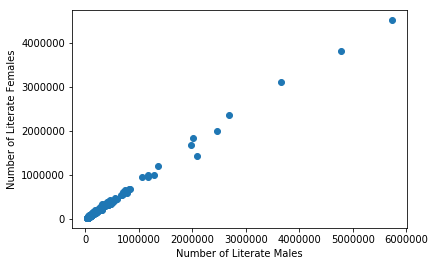

In [56]:
plt.scatter(literates.column(0), literates.column(1))
plt.xlabel("Number of Literate Males")
plt.ylabel("Number of Literate Females")
plt.show()

It looks like these two variables are linearly correlated (**remember, it doesn't always make sense to do linear regression!**). Try and fill in the following prediction function to predict the number of literate females in a state given the number of literate males:

In [57]:
def predict_literate_females(literate_males):
    "***YOUR CODE HERE***"

Now, use your prediction function to predict the number of literate females in state that has 15424990 literate males.

In [58]:
"***YOUR CODE HERE***"

'***YOUR CODE HERE***'

Calculate the mean average error of our model. Refer to the code in the previous section if need be!

In [47]:
"***YOUR CODE HERE***"

'***YOUR CODE HERE***'

That's all we have for you in this notebook. However, the `cities` table contains quite a bit of data - see if you can try and find linear patterns between other variables and create models for them! As well, try and see if you can find pairs of variables in the table that don't appear to have linear correlation – these are cases where we wouldn't use linear regression.